<a href="https://colab.research.google.com/github/utkarshtambe10/LetsGrowMore-Data-Science-Internship-Tasks/blob/main/Stock_Market_Prediction_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LetsGrowMore - Beginner Level Task 2
##Stock Market Prediction and Forecasting using Stacked LSTM

I am using the Stacked LSTM (long short-term memory) as supervised. A famous machine-learning model for stock-market prediction and forecasting.

In [ ]:
import warnings
warnings.filterwarnings('ignore')


#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importing Dataset

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset = pd.read_csv(url)


#Exploratory Data Analysis

In [ ]:
dataset.head()  #first, six records of the dataset


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset.tail()  #last, six records of the dataset


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
#shape of data
dataset.shape


(2035, 8)

In [ ]:
dataset.info()  #basic information of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
dataset.describe()  #statistical information of the dataset


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
dataset.isnull().sum()  #checking for any null values


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

#Data Visualization

In [ ]:
dataset.columns


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

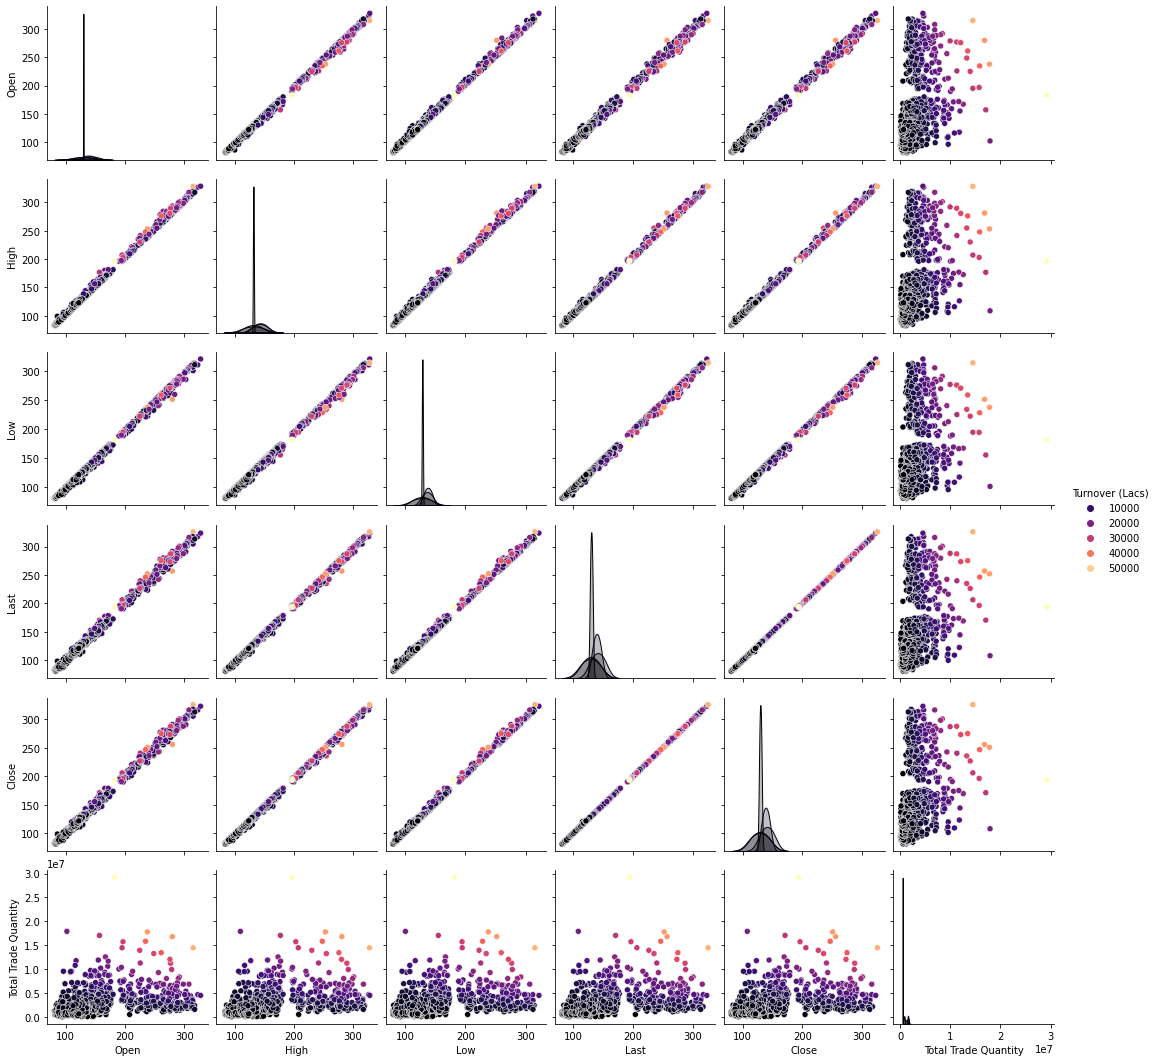

In [ ]:
sns.pairplot(dataset, hue="Turnover (Lacs)", palette="magma")
plt.show()


Close value graph of the stock

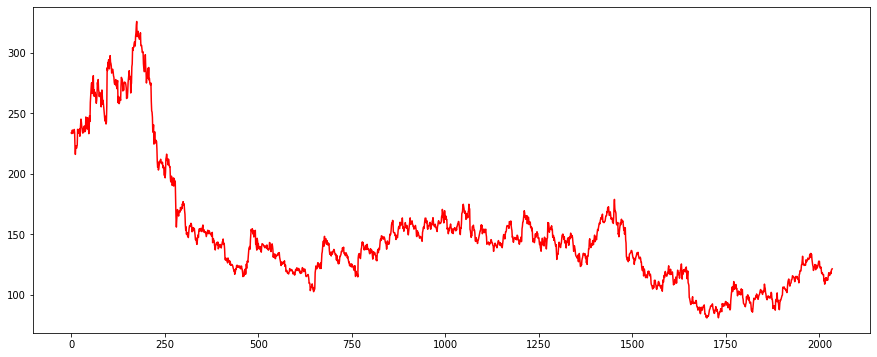

In [ ]:
plt.figure(figsize=(15, 6))
dt_close = dataset.reset_index()["Close"]
plt.plot(dt_close, color="red")
plt.show()


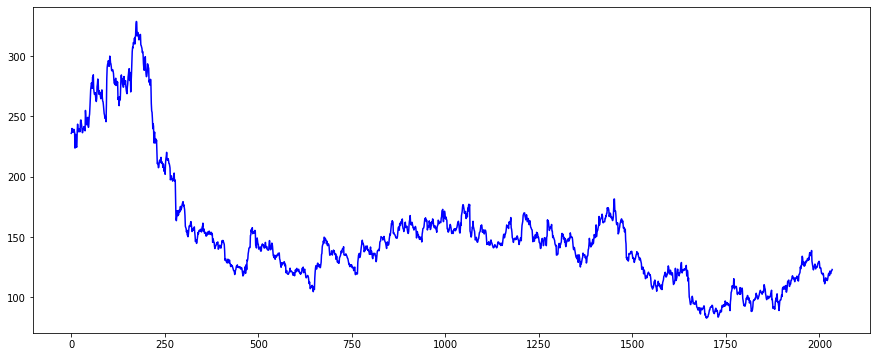

In [ ]:
plt.figure(figsize=(15, 6))
dt_high = dataset.reset_index()["High"]
plt.plot(dt_high, color="blue")
plt.show()


As, per the requirement to the sensitivity of the scale, applying MinMax scalar to transform the values between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))  #giving, min and max values
dt_high = scaler.fit_transform(np.array(dt_high).reshape(-1, 1))


In [ ]:
dt_high.shape


(2035, 1)

In [ ]:
print(dt_high)


[[0.62268754]
 [0.62614353]
 [0.6391543 ]
 ...
 [0.15917869]
 [0.15938199]
 [0.16344786]]


Now, splitting the dataset into train(70%) as the time-series data is one in which data is dependent on the other data. So, the test size is difference between the length of dataset and training size i.e. (30% here)

In [ ]:
train_size = int(len(dt_high) * 0.75)
test_size = len(dt_high) - train_size
train_data, test_data = dt_high[0: train_size, :], dt_high[train_size: len(dt_high), : 1]


In [ ]:
train_size, test_size


(1526, 509)

#Data Preprocessing

In [ ]:
def create_stock_dataset(dt, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dt) - time_step - 1):
    a = dt[i: (i + time_step), 0]
    dataX.append(a)
    dataY.append(dt[i + time_step, 0])
  return np.array(dataX), np.array(dataY)


In [ ]:
time_step = 100
x_train, y_train = create_stock_dataset(train_data, time_step)
x_test, y_test = create_stock_dataset(test_data, time_step)


#LSTM

Reshaping the input as [samples, time-stamps, features] according to the requirements of the LSTM.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [ ]:
print(x_train.shape), print(y_train.shape)


(1425, 100, 1)
(1425,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)


(408, 100, 1)
(408,)


(None, None)

Importing required modules for stacked LSTM

In [ ]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [ ]:
#creating the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 16, verbose = 1)


Epoch 1/30
90/90 [==============================] - 112s 1s/step - loss: 0.0106 - val_loss: 0.0012
Epoch 2/30
90/90 [==============================] - 97s 1s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/30
90/90 [==============================] - 97s 1s/step - loss: 0.0013 - val_loss: 9.8022e-04
Epoch 4/30
90/90 [==============================] - 99s 1s/step - loss: 9.6563e-04 - val_loss: 5.7970e-04
Epoch 5/30
90/90 [==============================] - 95s 1s/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/30
90/90 [==============================] - 98s 1s/step - loss: 8.3146e-04 - val_loss: 7.1079e-04
Epoch 7/30
90/90 [==============================] - 95s 1s/step - loss: 8.2044e-04 - val_loss: 9.1280e-04
Epoch 8/30
90/90 [==============================] - 120s 1s/step - loss: 8.8991e-04 - val_loss: 7.0300e-04
Epoch 9/30
90/90 [==============================] - 98s 1s/step - loss: 7.5094e-04 - val_loss: 5.1524e-04
Epoch 10/30
90/90 [==============================] - 96s 1s/step - loss:

In [ ]:
#predicting and checking performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


In [ ]:
#transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
#calculating RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))


165.38746786190572

In [ ]:
#testing the RMSE data
math.sqrt(mean_squared_error(y_test, test_predict))


109.29025723463268

#Plotting the train data and test data

In [ ]:
#shift-train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(dt_high)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict

#shift-test prediction for plotting
testPredictPlot = np.empty_like(dt_high)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(dt_high) - 1 :] = test_predict


Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


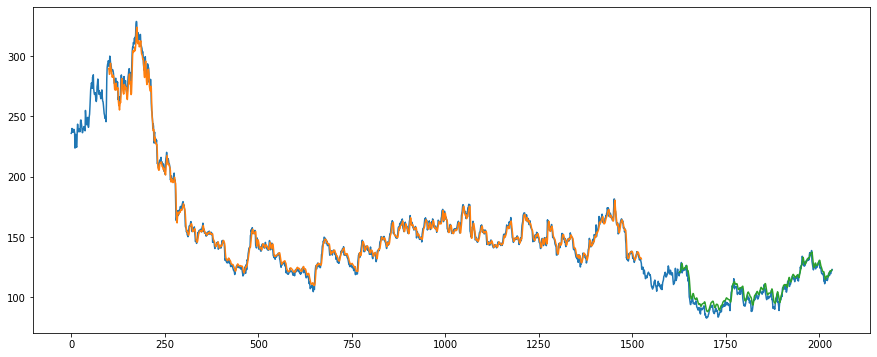

In [ ]:
#plotting baseline and predictions
plt.figure(figsize=(15, 6))

plt.plot(scaler.inverse_transform(dt_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")


In [ ]:
#predicting the stock-price of next 30 days or a month
len(test_data), x_test.shape


(509, (408, 100, 1))

In [ ]:
x_input = test_data[409: ].reshape(1, -1)
x_input.shape


(1, 100)

#Values Prediction

Predicting the stock values for next 30 days or 1 month

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
nextNumberOfDays = 30
i = 0

while(i < nextNumberOfDays):
  if(len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    #print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose = 0)
    #print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose = 0)
    #print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    #print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1

print(lst_output)


[[0.16642595827579498], [0.16938787698745728], [0.17240671813488007], [0.1753707230091095], [0.17823411524295807], [0.18097859621047974], [0.1835986226797104], [0.18609657883644104], [0.18848001956939697], [0.19075943529605865], [0.19294652342796326], [0.19505251944065094], [0.1970873326063156], [0.19905908405780792], [0.20097391307353973], [0.2028360366821289], [0.2046481966972351], [0.20641188323497772], [0.20812778174877167], [0.20979614555835724], [0.21141700446605682], [0.21299047768115997], [0.2145167738199234], [0.2159964144229889], [0.21743017435073853], [0.2188190519809723], [0.2201642245054245], [0.22146698832511902], [0.22272878885269165], [0.223951056599617]]


In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)


In [ ]:
day_new.shape


(100,)

In [ ]:
day_pred.shape


(30,)

In [ ]:
ds3 = dt_high.tolist()
ds3.extend(lst_output)

len(dt_high)


2035

Gaph of actual values of last 100 days

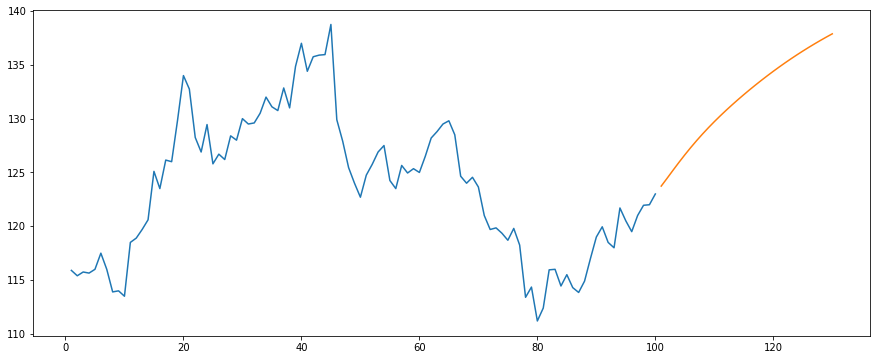

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(day_new, scaler.inverse_transform(dt_high[1935: ]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()


Graph of predicted values of next 30 days

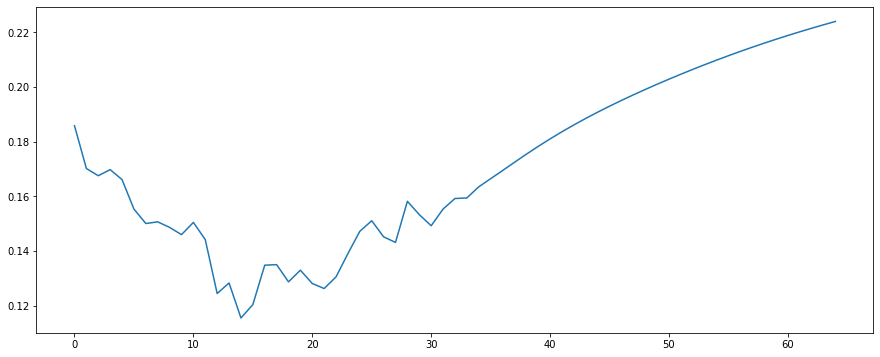

In [ ]:
plt.figure(figsize=(15, 6))

ds3 = dt_high.tolist()
ds3.extend(lst_output)
plt.plot(ds3[2000: ])

plt.show()


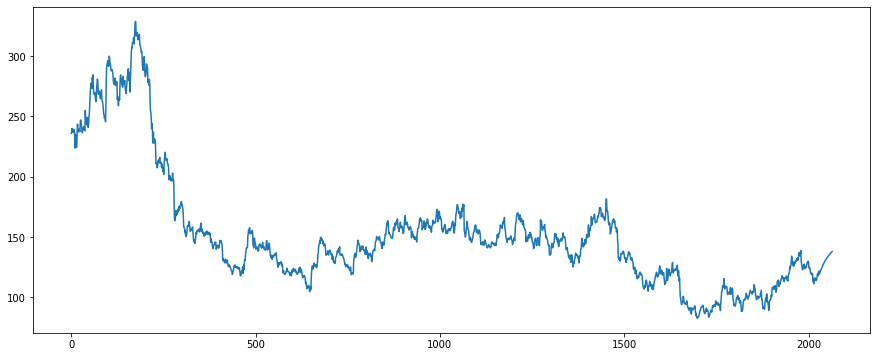

In [ ]:
plt.figure(figsize=(15, 6))
ds3 = scaler.inverse_transform(ds3).tolist()
plt.plot(ds3)

plt.show()
